In [37]:
import pandas as pd
# from datetime import datetime

path_17 = "/Users/pcsishun/project_scg/project_hlr/data/data_2025-7-30.csv"
df_17 = pd.read_csv(path_17)


df = df_17
df = df.drop(columns=['id', 'temp', 'humidity', 'co2'])
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['timestamp_thai'] = df['timestamp'].dt.tz_convert('Asia/Bangkok')
df['time_only'] = df['timestamp_thai'].dt.time
# df
start_time = pd.to_datetime("08:45:00").time()
end_time = pd.to_datetime("11:31:00").time()

df['formatted'] = df['timestamp_thai'].dt.strftime('%Y/%m/%d %H:%M:%S')
df = df[(df['time_only'] >= start_time) & (df['time_only'] <= end_time)]

df = df[df['device_name'].isin(['tongdy_3', 'tongdy_4'])]
df['device_name_label'] = df['device_name_label'].replace({'Carbon inlet': 'CO2 HLR Inlet'})

pivot_df = df.pivot(index='formatted', columns=['device_name_label'], values='adjust_co2')
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={
    'Carbon Outlet': 'CO2 Inlet',
    'HLR Exhaust': 'Co2 Regen'
})

# pivot_df = pivot_df.dropna()
# pivot_df['timestamp'] =  pd.to_datetime(pivot_df['formatted'])
# pivot_df = pivot_df.drop(columns=['formatted'])
# pivot_df
pivot_df['formatted'] = pd.to_datetime(pivot_df['formatted'])
pivot_df['minute'] = pivot_df['formatted'].dt.floor('min')
mean_per_minute = pivot_df.groupby('minute').mean().reset_index()
mean_per_minute = mean_per_minute.rename(columns={'minute': 'timestamp'})
mean_per_minute = mean_per_minute.drop(columns=['formatted'])
mean_per_minute


,timestamp,CO2 Inlet,Co2 Regen
0,2025-07-30 08:45:00,484.124457,499.729101
1,2025-07-30 08:46:00,483.073087,496.359588
2,2025-07-30 08:47:00,481.496032,491.866905
3,2025-07-30 08:48:00,479.918977,484.566293
4,2025-07-30 08:49:00,474.662127,478.388852
...,...,...,...
161,2025-07-30 11:26:00,2474.893552,2416.981998
162,2025-07-30 11:27:00,2468.585332,2414.735657
163,2025-07-30 11:28:00,2476.470607,2424.282610
164,2025-07-30 11:29:00,2473.316497,2423.721025


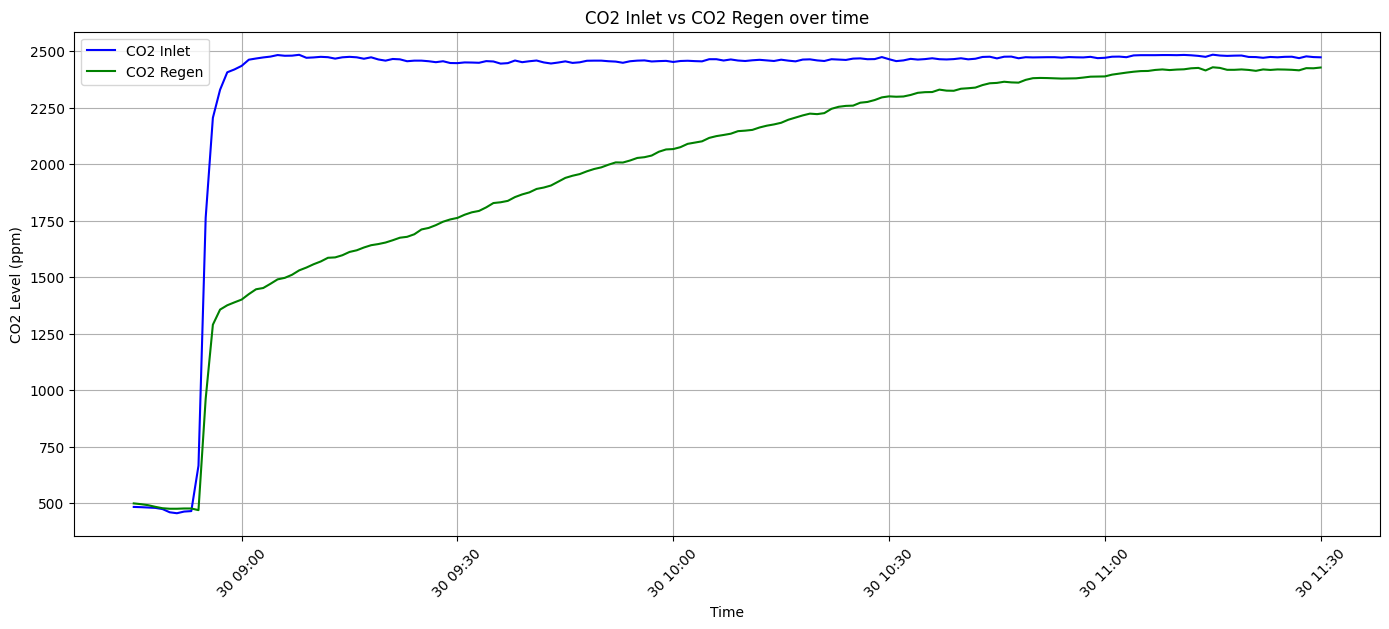

In [38]:
import matplotlib.pyplot as plt

mean_per_minute['timestamp'] = pd.to_datetime(mean_per_minute['timestamp'])
plt.figure(figsize=(14, 6))

plt.plot(mean_per_minute['timestamp'], mean_per_minute['CO2 Inlet'], label='CO2 Inlet', color='blue')
plt.plot(mean_per_minute['timestamp'], mean_per_minute['Co2 Regen'], label='CO2 Regen', color='green')
plt.xlabel('Time')
plt.ylabel('CO2 Level (ppm)')
plt.title('CO2 Inlet vs CO2 Regen over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [39]:
mean_per_minute.to_csv('hlr_update_adjust_co2_30_07__0845-1130.csv')

In [36]:
pivot_df
pivot_df.to_csv('hlr_test_30_07__0845-1130.csv')